In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
from torch import Tensor
torch.manual_seed(42)
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models, utils
from torch.utils.data import Dataset, Subset, DataLoader, random_split
import torchvision.utils

In [ ]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#### Load Dataset
# Creat Train Test Loader
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 50

normalize = transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010])

# define transforms
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    normalize])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
cifar10_trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
cifar10_testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

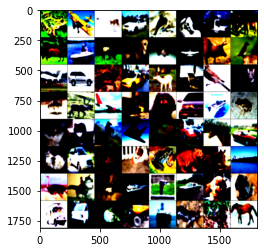

frog plane deer car bird horse truck deer horse ship deer dog frog plane deer bird


In [ ]:
def imshow(img):
    img = img
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(cifar10_trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%s' % classes[labels[j]] for j in range(16)))

In [ ]:
# Train the model
def train(model, train_loader, test_loader, criterion, optimizer, num_epoch):
    for epochs in range(num_epochs):
        model.train()
        print("Epoch number %d " % (epochs + 1))
        running_loss = 0 
        running_correct = 0
        total = 0

        for data in train_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            total += labels.size(0)

          # Forward pass
            outputs = model(images)
#             print(outputs.shape)
#             print(labels.shape)
            loss = criterion(outputs, labels)

          # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)

            running_loss += loss.item()
            running_correct += (labels==predicted).sum().item()

        epoch_loss = running_loss/len(train_loader)
        epoch_acc = 100 * running_correct/total

        print("Training \n Got %d out of %d images correctely (%.3f%%). Epoch loss: %.3f" %(running_correct, total, epoch_acc, epoch_loss))
    return model

In [ ]:
def evaluate(model, test_loader):# Evaluate accuracy on test set
    model.eval() # Set the model to evaluation mode  
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            total += labels.size(0)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

            epoch_acc = 100 * correct/total

    print("Testing \n Got %d out of %d images correctely (%.3f%%)." %(correct, total, epoch_acc))

In [ ]:
#MSNet-1
from torchsummary import summary
torch.set_default_tensor_type('torch.cuda.FloatTensor')

class MSNet1(nn.Module):
    def __init__(self, f1, f2, f3, f4, f5):
        super(MSNet1, self).__init__()
        self.conv1_3 = nn.Conv2d(3, f1, kernel_size=(3,3), padding='same')
        self.conv2_3 = nn.Conv2d(f1, f2, kernel_size=(3,3), padding='same')
        self.conv3_3 = nn.Conv2d(f2, f3, kernel_size=(3,3), padding='same')
        self.conv4_3 = nn.Conv2d(f3, f4, kernel_size=(3,3), padding='same')
        self.conv5_3 = nn.Conv2d(f4, f5, kernel_size=(3,3), padding='same')
        
        self.conv1_5 = nn.Conv2d(3, f1, kernel_size=(5,5), padding='same')
        self.conv2_5 = nn.Conv2d(f1, f2, kernel_size=(5,5), padding='same')
        self.conv3_5 = nn.Conv2d(f2, f3, kernel_size=(5,5), padding='same')
        self.conv4_5 = nn.Conv2d(f3, f4, kernel_size=(5,5), padding='same')
        self.conv5_5 = nn.Conv2d(f4, f5, kernel_size=(5,5), padding='same')

        self.convf1_3 = nn.Conv2d(f1, f1, kernel_size=(3,3), padding='same')
        self.convf2_3 = nn.Conv2d(f2, f2, kernel_size=(3,3), padding='same')
        self.convf3_3 = nn.Conv2d(f3, f3, kernel_size=(3,3), padding='same')
        self.convf4_3 = nn.Conv2d(f4, f4, kernel_size=(3,3), padding='same')
        self.convf5_3 = nn.Conv2d(f5, f5, kernel_size=(3,3), padding='same')
        
        self.convf1_5 = nn.Conv2d(f1, f1, kernel_size=(5,5), padding='same')
        self.convf2_5 = nn.Conv2d(f2, f2, kernel_size=(5,5), padding='same')
        self.convf3_5 = nn.Conv2d(f3, f3, kernel_size=(5,5), padding='same')
        self.convf4_5 = nn.Conv2d(f4, f4, kernel_size=(5,5), padding='same')
        self.convf5_5 = nn.Conv2d(f5, f5, kernel_size=(5,5), padding='same')
        
        self.bn_f1 = nn.BatchNorm2d(f1)
        self.bn_f2 = nn.BatchNorm2d(f2)
        self.bn_f3 = nn.BatchNorm2d(f3)
        self.bn_f4 = nn.BatchNorm2d(f4)
        self.bn_f5 = nn.BatchNorm2d(f5)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=(2,2))
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(p=0.5)
        self.dense2 = nn.Linear(128, 10)
        self.dense1 = nn.Linear(12544, 128)
        self.softmax = nn.Softmax(dim=1)

    
    def forward(self, x):
        c1 = self.conv1_3(x)
        b1 = self.bn_f1(c1)
        r1 = self.relu(b1)
        c2 = self.conv1_5(x)
        b2 = self.bn_f1(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(32, 16, kernel_size=(1,1), padding='same')(cat)
        p1 = self.pool(conv1) # MS-Block Ends
        
        c1 = self.conv2_3(p1)
        b1 = self.bn_f2(c1)
        r1 = self.relu(b1)
        c2 = self.conv2_5(p1)
        b2 = self.bn_f2(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(64, 32, kernel_size=(1,1), padding='same')(cat)
        p1 = self.pool(conv1) # MS-Block Ends
        
        c1 = self.conv3_3(p1)
        b1 = self.bn_f3(c1)
        r1 = self.relu(b1)
        c2 = self.conv3_5(p1)
        b2 = self.bn_f3(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(128, 64, kernel_size=(1,1), padding='same')(cat)
        p1 = self.pool(conv1) # MS-Block Ends
        
        c1 = self.conv4_3(p1)
        b1 = self.bn_f4(c1)
        r1 = self.relu(b1)
        c2 = self.conv4_5(p1)
        b2 = self.bn_f4(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(256, 128, kernel_size=(1,1), padding='same')(cat)
        p1 = self.pool(conv1) # MS-Block Ends
        
        c1 = self.conv5_3(p1)
        b1 = self.bn_f5(c1)
        r1 = self.relu(b1)
        c2 = self.conv5_5(p1)
        b2 = self.bn_f5(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(512, 256, kernel_size=(1,1), padding='same')(cat)
        p1 = self.pool(conv1) # MS-Block Ends
        
        f = self.flatten(p1)
        d = self.dropout(f)
        l = self.dense1(d)
        d = self.dropout(l)
        l = self.dense2(d)
        s = self.softmax(l)
        return l

model= MSNet1(16,32,64,128,256)
device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)
model = model.to(device)


summary(model, (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
       BatchNorm2d-2         [-1, 16, 224, 224]              32
              ReLU-3         [-1, 16, 224, 224]               0
            Conv2d-4         [-1, 16, 224, 224]           1,216
       BatchNorm2d-5         [-1, 16, 224, 224]              32
              ReLU-6         [-1, 16, 224, 224]               0
         MaxPool2d-7         [-1, 16, 112, 112]               0
            Conv2d-8         [-1, 32, 112, 112]           4,640
       BatchNorm2d-9         [-1, 32, 112, 112]              64
             ReLU-10         [-1, 32, 112, 112]               0
           Conv2d-11         [-1, 32, 112, 112]          12,832
      BatchNorm2d-12         [-1, 32, 112, 112]              64
             ReLU-13         [-1, 32, 112, 112]               0
        MaxPool2d-14           [-1, 32,

In [ ]:
#MSNet-2
from torchsummary import summary
torch.set_default_tensor_type('torch.cuda.FloatTensor')

class MSNet2(nn.Module):
    def __init__(self, f1, f2, f3, f4, f5):
        super(MSNet2, self).__init__()
        self.conv1_3 = nn.Conv2d(3, f1, kernel_size=(3,3), padding='same')
        self.conv2_3 = nn.Conv2d(f1, f2, kernel_size=(3,3), padding='same')
        self.conv3_3 = nn.Conv2d(f2, f3, kernel_size=(3,3), padding='same')
        self.conv4_3 = nn.Conv2d(f3, f4, kernel_size=(3,3), padding='same')
        self.conv5_3 = nn.Conv2d(f4, f5, kernel_size=(3,3), padding='same')
        
        self.conv1_5 = nn.Conv2d(3, f1, kernel_size=(5,5), padding='same')
        self.conv2_5 = nn.Conv2d(f1, f2, kernel_size=(5,5), padding='same')
        self.conv3_5 = nn.Conv2d(f2, f3, kernel_size=(5,5), padding='same')
        self.conv4_5 = nn.Conv2d(f3, f4, kernel_size=(5,5), padding='same')
        self.conv5_5 = nn.Conv2d(f4, f5, kernel_size=(5,5), padding='same')

        self.convf1_3 = nn.Conv2d(f1, f1, kernel_size=(3,3), padding='same')
        self.convf2_3 = nn.Conv2d(f2, f2, kernel_size=(3,3), padding='same')
        self.convf3_3 = nn.Conv2d(f3, f3, kernel_size=(3,3), padding='same')
        self.convf4_3 = nn.Conv2d(f4, f4, kernel_size=(3,3), padding='same')
        self.convf5_3 = nn.Conv2d(f5, f5, kernel_size=(3,3), padding='same')
        
        self.convf1_5 = nn.Conv2d(f1, f1, kernel_size=(5,5), padding='same')
        self.convf2_5 = nn.Conv2d(f2, f2, kernel_size=(5,5), padding='same')
        self.convf3_5 = nn.Conv2d(f3, f3, kernel_size=(5,5), padding='same')
        self.convf4_5 = nn.Conv2d(f4, f4, kernel_size=(5,5), padding='same')
        self.convf5_5 = nn.Conv2d(f5, f5, kernel_size=(5,5), padding='same')
        
        self.bn_f1 = nn.BatchNorm2d(f1)
        self.bn_f2 = nn.BatchNorm2d(f2)
        self.bn_f3 = nn.BatchNorm2d(f3)
        self.bn_f4 = nn.BatchNorm2d(f4)
        self.bn_f5 = nn.BatchNorm2d(f5)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=(2,2))
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(p=0.5)
        self.dense2 = nn.Linear(128, 10)
        self.dense1 = nn.Linear(12544, 128)
        self.softmax = nn.Softmax(dim=1)

    
    def forward(self, x):
        c1 = self.conv1_3(x)
        b1 = self.bn_f1(c1)
        r1 = self.relu(b1)
        c2 = self.conv1_5(x)
        b2 = self.bn_f1(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(32, 16, kernel_size=(1,1), padding='same')(cat)
        c1 = self.convf1_3(conv1)
        b1 = self.bn_f1(c1)
        r1 = self.relu(b1)
        c2 = self.convf1_5(conv1)
        b2 = self.bn_f1(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(32, 16, kernel_size=(1,1), padding='same')(cat)
        p1 = self.pool(conv1) # MS-Block Ends
        
        c1 = self.conv2_3(p1)
        b1 = self.bn_f2(c1)
        r1 = self.relu(b1)
        c2 = self.conv2_5(p1)
        b2 = self.bn_f2(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(64, 32, kernel_size=(1,1), padding='same')(cat)
        c1 = self.convf2_3(conv1)
        b1 = self.bn_f2(c1)
        r1 = self.relu(b1)
        c2 = self.convf2_5(conv1)
        b2 = self.bn_f2(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(64, 32, kernel_size=(1,1), padding='same')(cat)
        p1 = self.pool(conv1) # MS-Block Ends
        
        c1 = self.conv3_3(p1)
        b1 = self.bn_f3(c1)
        r1 = self.relu(b1)
        c2 = self.conv3_5(p1)
        b2 = self.bn_f3(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(128, 64, kernel_size=(1,1), padding='same')(cat)
        c1 = self.convf3_3(conv1)
        b1 = self.bn_f3(c1)
        r1 = self.relu(b1)
        c2 = self.convf3_5(conv1)
        b2 = self.bn_f3(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(128, 64, kernel_size=(1,1), padding='same')(cat)
        p1 = self.pool(conv1) # MS-Block Ends
        
        c1 = self.conv4_3(p1)
        b1 = self.bn_f4(c1)
        r1 = self.relu(b1)
        c2 = self.conv4_5(p1)
        b2 = self.bn_f4(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(256, 128, kernel_size=(1,1), padding='same')(cat)
        c1 = self.convf4_3(conv1)
        b1 = self.bn_f4(c1)
        r1 = self.relu(b1)
        c2 = self.convf4_5(conv1)
        b2 = self.bn_f4(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(256, 128, kernel_size=(1,1), padding='same')(cat)
        p1 = self.pool(conv1) # MS-Block Ends
        
        c1 = self.conv5_3(p1)
        b1 = self.bn_f5(c1)
        r1 = self.relu(b1)
        c2 = self.conv5_5(p1)
        b2 = self.bn_f5(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(512, 256, kernel_size=(1,1), padding='same')(cat)
        c1 = self.convf5_3(conv1)
        b1 = self.bn_f5(c1)
        r1 = self.relu(b1)
        c2 = self.convf5_5(conv1)
        b2 = self.bn_f5(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(512, 256, kernel_size=(1,1), padding='same')(cat)
        p1 = self.pool(conv1) # MS-Block Ends
        
        f = self.flatten(p1)
        d = self.dropout(f)
        l = self.dense1(d)
        d = self.dropout(l)
        l = self.dense2(d)
        s = self.softmax(l)
        return l

model= MSNet2(16,32,64,128,256)
device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)
model = model.to(device)


summary(model, (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
       BatchNorm2d-2         [-1, 16, 224, 224]              32
              ReLU-3         [-1, 16, 224, 224]               0
            Conv2d-4         [-1, 16, 224, 224]           1,216
       BatchNorm2d-5         [-1, 16, 224, 224]              32
              ReLU-6         [-1, 16, 224, 224]               0
            Conv2d-7         [-1, 16, 224, 224]           2,320
       BatchNorm2d-8         [-1, 16, 224, 224]              32
              ReLU-9         [-1, 16, 224, 224]               0
           Conv2d-10         [-1, 16, 224, 224]           6,416
      BatchNorm2d-11         [-1, 16, 224, 224]              32
             ReLU-12         [-1, 16, 224, 224]               0
        MaxPool2d-13         [-1, 16, 112, 112]               0
           Conv2d-14         [-1, 32, 1

In [ ]:
#MSNet-3
from torchsummary import summary
torch.set_default_tensor_type('torch.cuda.FloatTensor')

class MSNet3(nn.Module):
    def __init__(self, f1, f2, f3, f4, f5):
        super(MSNet3, self).__init__()
        self.conv1_3 = nn.Conv2d(3, f1, kernel_size=(3,3), padding='same')
        self.conv2_3 = nn.Conv2d(f1, f2, kernel_size=(3,3), padding='same')
        self.conv3_3 = nn.Conv2d(f2, f3, kernel_size=(3,3), padding='same')
        self.conv4_3 = nn.Conv2d(f3, f4, kernel_size=(3,3), padding='same')
        self.conv5_3 = nn.Conv2d(f4, f5, kernel_size=(3,3), padding='same')
        
        self.conv1_5 = nn.Conv2d(3, f1, kernel_size=(5,5), padding='same')
        self.conv2_5 = nn.Conv2d(f1, f2, kernel_size=(5,5), padding='same')
        self.conv3_5 = nn.Conv2d(f2, f3, kernel_size=(5,5), padding='same')
        self.conv4_5 = nn.Conv2d(f3, f4, kernel_size=(5,5), padding='same')
        self.conv5_5 = nn.Conv2d(f4, f5, kernel_size=(5,5), padding='same')

        self.convf1_3 = nn.Conv2d(f1, f1, kernel_size=(3,3), padding='same')
        self.convf2_3 = nn.Conv2d(f2, f2, kernel_size=(3,3), padding='same')
        self.convf3_3 = nn.Conv2d(f3, f3, kernel_size=(3,3), padding='same')
        self.convf4_3 = nn.Conv2d(f4, f4, kernel_size=(3,3), padding='same')
        self.convf5_3 = nn.Conv2d(f5, f5, kernel_size=(3,3), padding='same')
        
        self.convf1_5 = nn.Conv2d(f1, f1, kernel_size=(5,5), padding='same')
        self.convf2_5 = nn.Conv2d(f2, f2, kernel_size=(5,5), padding='same')
        self.convf3_5 = nn.Conv2d(f3, f3, kernel_size=(5,5), padding='same')
        self.convf4_5 = nn.Conv2d(f4, f4, kernel_size=(5,5), padding='same')
        self.convf5_5 = nn.Conv2d(f5, f5, kernel_size=(5,5), padding='same')
        
        self.bn_f1 = nn.BatchNorm2d(f1)
        self.bn_f2 = nn.BatchNorm2d(f2)
        self.bn_f3 = nn.BatchNorm2d(f3)
        self.bn_f4 = nn.BatchNorm2d(f4)
        self.bn_f5 = nn.BatchNorm2d(f5)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=(2,2))
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(p=0.5)
        self.dense2 = nn.Linear(128, 10)
        self.dense1 = nn.Linear(12544, 128)
        self.softmax = nn.Softmax(dim=1)

    
    def forward(self, x):
        c1 = self.conv1_3(x)
        b1 = self.bn_f1(c1)
        r1 = self.relu(b1)
        c2 = self.conv1_5(x)
        b2 = self.bn_f1(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(32, 16, kernel_size=(1,1), padding='same')(cat)
        c1 = self.convf1_3(conv1)
        b1 = self.bn_f1(c1)
        r1 = self.relu(b1)
        c2 = self.convf1_5(conv1)
        b2 = self.bn_f1(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(32, 16, kernel_size=(1,1), padding='same')(cat)
        c1 = self.convf1_3(conv1)
        b1 = self.bn_f1(c1)
        r1 = self.relu(b1)
        c2 = self.convf1_5(conv1)
        b2 = self.bn_f1(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(32, 16, kernel_size=(1,1), padding='same')(cat)
        p1 = self.pool(conv1) # MS-Block Ends
        
        c1 = self.conv2_3(p1)
        b1 = self.bn_f2(c1)
        r1 = self.relu(b1)
        c2 = self.conv2_5(p1)
        b2 = self.bn_f2(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(64, 32, kernel_size=(1,1), padding='same')(cat)
        c1 = self.convf2_3(conv1)
        b1 = self.bn_f2(c1)
        r1 = self.relu(b1)
        c2 = self.convf2_5(conv1)
        b2 = self.bn_f2(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(64, 32, kernel_size=(1,1), padding='same')(cat)
        c1 = self.convf2_3(conv1)
        b1 = self.bn_f2(c1)
        r1 = self.relu(b1)
        c2 = self.convf2_5(conv1)
        b2 = self.bn_f2(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(64, 32, kernel_size=(1,1), padding='same')(cat)
        p1 = self.pool(conv1) # MS-Block Ends
        
        c1 = self.conv3_3(p1)
        b1 = self.bn_f3(c1)
        r1 = self.relu(b1)
        c2 = self.conv3_5(p1)
        b2 = self.bn_f3(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(128, 64, kernel_size=(1,1), padding='same')(cat)
        c1 = self.convf3_3(conv1)
        b1 = self.bn_f3(c1)
        r1 = self.relu(b1)
        c2 = self.convf3_5(conv1)
        b2 = self.bn_f3(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(128, 64, kernel_size=(1,1), padding='same')(cat)
        c1 = self.convf3_3(conv1)
        b1 = self.bn_f3(c1)
        r1 = self.relu(b1)
        c2 = self.convf3_5(conv1)
        b2 = self.bn_f3(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(128, 64, kernel_size=(1,1), padding='same')(cat)
        p1 = self.pool(conv1) # MS-Block Ends
        
        c1 = self.conv4_3(p1)
        b1 = self.bn_f4(c1)
        r1 = self.relu(b1)
        c2 = self.conv4_5(p1)
        b2 = self.bn_f4(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(256, 128, kernel_size=(1,1), padding='same')(cat)
        c1 = self.convf4_3(conv1)
        b1 = self.bn_f4(c1)
        r1 = self.relu(b1)
        c2 = self.convf4_5(conv1)
        b2 = self.bn_f4(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(256, 128, kernel_size=(1,1), padding='same')(cat)
        c1 = self.convf4_3(conv1)
        b1 = self.bn_f4(c1)
        r1 = self.relu(b1)
        c2 = self.convf4_5(conv1)
        b2 = self.bn_f4(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(256, 128, kernel_size=(1,1), padding='same')(cat)
        p1 = self.pool(conv1) # MS-Block Ends
        
        c1 = self.conv5_3(p1)
        b1 = self.bn_f5(c1)
        r1 = self.relu(b1)
        c2 = self.conv5_5(p1)
        b2 = self.bn_f5(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(512, 256, kernel_size=(1,1), padding='same')(cat)
        c1 = self.convf5_3(conv1)
        b1 = self.bn_f5(c1)
        r1 = self.relu(b1)
        c2 = self.convf5_5(conv1)
        b2 = self.bn_f5(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(512, 256, kernel_size=(1,1), padding='same')(cat)
        c1 = self.convf5_3(conv1)
        b1 = self.bn_f5(c1)
        r1 = self.relu(b1)
        c2 = self.convf5_5(conv1)
        b2 = self.bn_f5(c2)
        r2 = self.relu(b2)
        cat = torch.cat([r1,r2], axis=1)
        conv1 =  nn.Conv2d(512, 256, kernel_size=(1,1), padding='same')(cat)
        p1 = self.pool(conv1) # MS-Block Ends
        
        f = self.flatten(p1)
        d = self.dropout(f)
        l = self.dense1(d)
        d = self.dropout(l)
        l = self.dense2(d)
        s = self.softmax(l)
        return l

model= MSNet3(16,32,64,128,256)
device = "cuda" if torch.cuda.is_available() else "cpu"
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0001
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)
model = model.to(device)


summary(model, (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
       BatchNorm2d-2         [-1, 16, 224, 224]              32
              ReLU-3         [-1, 16, 224, 224]               0
            Conv2d-4         [-1, 16, 224, 224]           1,216
       BatchNorm2d-5         [-1, 16, 224, 224]              32
              ReLU-6         [-1, 16, 224, 224]               0
            Conv2d-7         [-1, 16, 224, 224]           2,320
       BatchNorm2d-8         [-1, 16, 224, 224]              32
              ReLU-9         [-1, 16, 224, 224]               0
           Conv2d-10         [-1, 16, 224, 224]           6,416
      BatchNorm2d-11         [-1, 16, 224, 224]              32
             ReLU-12         [-1, 16, 224, 224]               0
           Conv2d-13         [-1, 16, 224, 224]           2,320
      BatchNorm2d-14         [-1, 16, 2

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)
train(model, cifar10_trainloader, cifar10_testloader, criterion, optimizer, num_epochs)

In [ ]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
cifar10_testloader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle=False, num_workers=4)

def evaluate(model, test_loader):# Evaluate accuracy on test set
    model.eval() # Set the model to evaluation mode  
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            total += labels.size(0)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

            epoch_acc = 100 * correct/total

    print("Testing \n Got %d out of %d images correctely (%.3f%%)." %(correct, total, epoch_acc))


def pgd_attack(model, images, labels, eps, alpha, steps):
    images = images.to(device)
    labels = labels.to(device)
    loss = nn.CrossEntropyLoss()
        
    original_images = images.data
        
    for i in range(steps) :    
        images.requires_grad = True
        outputs = model(images)

        model.zero_grad()
        cost = loss(outputs, labels).to(device)
        cost.backward()

        adv_images = images + alpha*images.grad.sign()
        eta = torch.clamp(adv_images - original_images, min=-eps, max=eps)
        images = torch.clamp(original_images + eta, min=0, max=1).detach_()
            
    return images



def test( model, device, test_loader, eps, alpha, steps ):
    # Accuracy counter
    correct = 0
    adv_examples = []
    model.eval()
    # Loop over all examples in test set
    for data in testloader:
        images, labels = data
        images, labels= images.to(device), labels.to(device)
        outputs = model(images)
        
        # Call PGD Attack
        adv_images = pgd_attack(model, images, labels, eps, alpha, steps)
        adv_pred = model(adv_images)
        _, predicted = torch.max(adv_pred.data, 1)
        correct += (predicted == labels).sum().item()

    # Calculate final accuracy for this epsilon
    final_acc = correct/float(len(test_loader))
    print("Step: {}\nTest Accuracy = {} / {} = {}".format(steps, correct, len(test_loader), final_acc))

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples

eps = 25/255
alpha = 0.01
testloader = cifar10_testloader
print("Performing a PGD attack with Step 1..")
acc1, example1 = test(model, device, testloader, eps, alpha, 1)
print("Performing a PGD attack with Steps 2..")
acc2, example2 = test(model, device, testloader, eps, alpha, 2)
print("Performing a PGD attack with Steps 5..")
acc5, example5 = test(model, device, testloader, eps, alpha, 5)
print("Performing a PGD attack with Steps 10..")
acc10, example10 = test(model, device, testloader, eps, alpha, 10)